### 1. ติดตั้ง packages ที่ต้องการใช้ โดยใช้คำสั่งทั้งหมด ดังนี้


In [ ]:
!pip install requests

In [ ]:
!pip install datetime

### 2. Import library

###### นำเข้า library ที่จะใช้งาน โดยใช้คำสั่ง ดังนี้

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

###### นำเข้า url ที่จะใช้ scrap

In [ ]:
baseurl = 'https://www.booking.com/searchresults.th.html?aid=318615&checkin=2021-11-29&checkout=2021-11-30&city=-3247115&order=upsort_bh&offset=0'

###### กำหนด User Agent ของ Browser


In [ ]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0'}

### 3. การเก็บ link url ของแต่ละหน้าใน web: Booking

###### เนื่องจาก Booking.com มีหน้า web โรงแรมทั้งหมด 39 หน้า เลยทำการ for loop และ กำหนด ให้ i * 25 เนื่องจากรูปแบบ web

In [ ]:
link_list=[]
for i in range(0,39):
    link = f'https://www.booking.com/searchresults.th.html?sid=2978b05d4860770445e3c136b854fb0e&aid=318615&lang=th&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.th.html%3Faid%3D318615%3Bsid%3D2978b05d4860770445e3c136b854fb0e%3Bsb_price_type%3Dtotal%3Bsrpvid%3Da5bc5b17680a0153%3Bsig%3Dv1plosq4eu%26%3B&ss=%E0%B9%80%E0%B8%8A%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88&is_ski_area=0&ssne=%E0%B9%80%E0%B8%8A%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88&ssne_untouched=%E0%B9%80%E0%B8%8A%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88&dest_id=-3247115&dest_type=city&checkin_year=2021&checkin_month=11&checkin_monthday=29&checkout_year=2021&checkout_month=11&checkout_monthday=30&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&offset={i*25}'
    link_list.append(link)

* หลังจากได้ link หน้า page มาแล้ว จึงทำการเก็บเข้า list และ scrap ทีละหน้า
 * ทำการเก็บ list item หลักของข้อมูลแต่ละโรมแรมในแต่ละหน้า (หน้าละ 25 โรงแรม) โดยทำการ select class และ get text ข้อความด้านใน ซึ่งประกอบไปด้วย Name (ชื่อโรงแรม), Location (สถานที่ตั้ง), Distance (ระยะห่างจากใจกลางเมืองเชียงใหม่), Room_type (ประเภทห้อง), Score (คะแนนจากผู้เข้าพัก), Rank (การจัดระดับ), Review_count (จำนวนความคิดเห็นจกผู้เข้าพัก), Type (จำนวนผู้เข้าพักต่อคืน), และ Price_after_discount (ราคาสุทธิหลังลด)
 * แต่เนื่องจาก class ของ Distance มีหลายตำแหน่ง เราเลยทำการเลือกตำแหน่งที่ 3 ที่แสดงเป็นระยะทางจากย่านใจกลางเมืองเชียงใหม่แทน
 * ถ้า Data ใน list ของเรา run แล้วเกิด error ขึ้น ก็จะทำการ except (ข้าม) ไม่ต้องเก็บเข้า list (เนื่องจากบางตัวนำไปเก็บเข้า list แล้วโดนตัวของโฆษณา ก็จะทำการข้ามไปทันที)
* หลังจากนั้นก็ทำการวน loop เก็บเข้ามาใน list เรื่อย ๆ จนครบ 39 หน้า (โดยเมื่อครบ 25 โรงแรมในแต่ละหน้า ก็ทำการเปลี่ยนหน้าไปเรื่อย ๆ)

In [ ]:
hotel_list = []
for i in link_list:
    r = requests.get(i, headers = headers)
    soup = BeautifulSoup(r.content, 'lxml')
    for item in soup.select('.fc21746a73'):
        try:
            name=item.select('._c445487e2')[0].get_text()
            location = item.select('.eba89149fb')[0].get_text()
            distance= item.select('.af1ddfc958')[2].get_text()
            room_type = item.select('._c5d12bf22')[0].get_text()
            score = item.select('.bd528f9ea6')[0].get_text()
            rank= item.select('.f1cbb919ef')[0].get_text()
            amount_review = item.select('._6e869d6e0')[0].get_text()
            size = item.select('._7ee1c7d14')[0].get_text()
            price_afterdiscount=item.select('._e885fdc12')[0].get_text()
            hotel = {
            'name': name,
            'location': location,
            'distance': distance,
            'room_type': room_type,
            'score': score,
            'rank': rank,
            'review_count': amount_review,
            'distance': distance,
            'type': size,
            'price_after_discount' : price_afterdiscount
            }
            hotel_list.append(hotel)            
        except Exception as e:
            None

###### นับจำนวนโรงแรมทั้งหมดที่เก็บเข้า list ได้

In [ ]:
len(hotel_list)

783

### 4. แสดง Data ของโรงแรมที่เก็บได้ทั้งหมด

In [ ]:
df=pd.DataFrame(hotel_list)
df

,name,location,distance,room_type,score,rank,review_count,type,price_after_discount
0,ยูรานาบูติคโฮเทล,"Si Phum, เชียงใหม่",1.2 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงใหญ่หรือเตียงแฝด,7.5,ดี,164 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$25
1,The Residence Hotel -SHA Plus,เชียงใหม่,2.3 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงใหญ่,7.1,ดี,36 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$21
2,FrenTé Chiang Mai,"Si Phum, เชียงใหม่",0.9 กม. จากย่านใจกลาง,ห้องเตียงใหญ่ราคาประหยัด,7.4,ดี,26 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$9
3,We Briza Hotel Chiangmai,"ช้างม่อย, เชียงใหม่",2.1 กม. จากย่านใจกลาง,ห้องสุพีเรียร์เตียงแฝด,7.7,ดี,"2,613 ความคิดเห็นจากผู้เข้าพัก",1 คืน ผู้ใหญ่ 2 ท่าน,US$18
4,Akyra Manor Chiang Mai Sha Plus,"นิมมานเหมินทร์, เชียงใหม่",1.5 กม. จากย่านใจกลาง,ห้องดีลักซ์เตียงใหญ่หรือเตียงแฝด,9.1,ดีเลิศ,167 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$111
...,...,...,...,...,...,...,...,...,...
778,Monkey Toe Guesthouse,"Si Phum, เชียงใหม่",0.7 กม. จากย่านใจกลาง,เตียงในห้องพักรวมชายหญิง 10 เตียง,8.8,ยอดเยี่ยม,409 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$8
779,Rimnim Hostel,"นิมมานเหมินทร์, เชียงใหม่",1.2 กม. จากย่านใจกลาง,เตียงสองชั้นในห้องพักรวมหญิง,9.3,ดีเลิศ,29 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$23
780,ไทย ไทย โฮสเทล,"ช้างคลาน, เชียงใหม่",2.3 กม. จากย่านใจกลาง,เตียงสองชั้นในห้องพักรวมหญิงชาย,9.3,ดีเลิศ,67 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$14
781,Inncome Hostel,"Si Phum, เชียงใหม่",1 กม. จากย่านใจกลาง,เตียงในห้องพักรวมชายหญิง 4 เตียง,8.9,ยอดเยี่ยม,4 ความคิดเห็นจากผู้เข้าพัก,1 คืน ผู้ใหญ่ 2 ท่าน,US$11


รูปตัวอย่างแสดงว่า Price_after_discount เป็น THB (ไทยบาท)

## 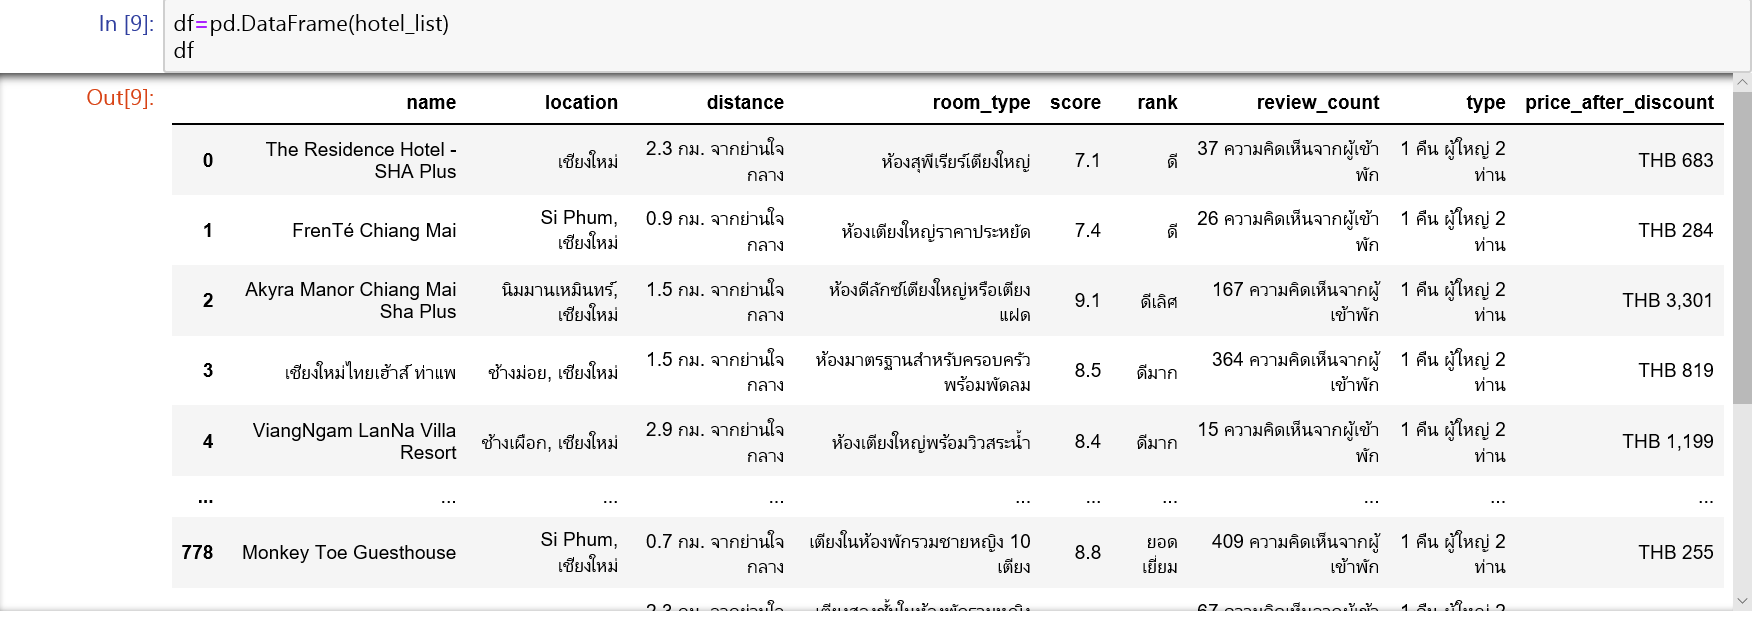

### 5. โหลดเก็บข้อมูลในรูปแบบ CSV

In [ ]:
df.to_csv('Booking_nobeforeprice.CSV')